# Week4 (Regression) 과제
## Boston Housing Data 분석
### 데이터 소개
- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 square feet.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxide concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property tax rate per $10,000.
- **PTRATIO**: Pupil-teacher ratio by town.
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
- **LSTAT**: Percentage of lower status of the population.

Target Variable:
- **MEDV**: Median value of owner-occupied homes in $1000s.

In [4]:
# 코랩 환경: 구글 드라이브를 코랩에 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# housing.xls가 포함된 경로를 저장해봅시다.
PATH = '/content/drive/My Drive/'

In [5]:
# 본인 구글 드라이브에 업로드한 housing.xls 파일의 주소를 넣어주세요!
house = pd.read_excel(PATH+'housing.xls')

# Q1: `head`, `info`, `describe`, `shape` 함수를 실행해봅시다.

과제2 참고

In [ ]:
# .head()
print(house.head())

# .info()
print(house.info())     # 행 506개, 열 14개, 결측치 없음

# .describe()
print(house.describe()) # 수치형 변수들에 대한 count, mean, std, min, 25%, 50%, 75%, max 출력

# .shape
print(house.shape)      # (506, 14)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float6

# Q2: 각 변수의 결측치 (NaN 또는 Null)의 개수를 구해봅시다.

과제2 참고

In [ ]:
# NaN의 개수 구하기
house.isna().sum()    # 모든 변수에 결측치가 0개

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# Q3: 각 변수별로 히스토그램을 그리고, Scatterplot Matrix를 그려봅시다

과제2 참고

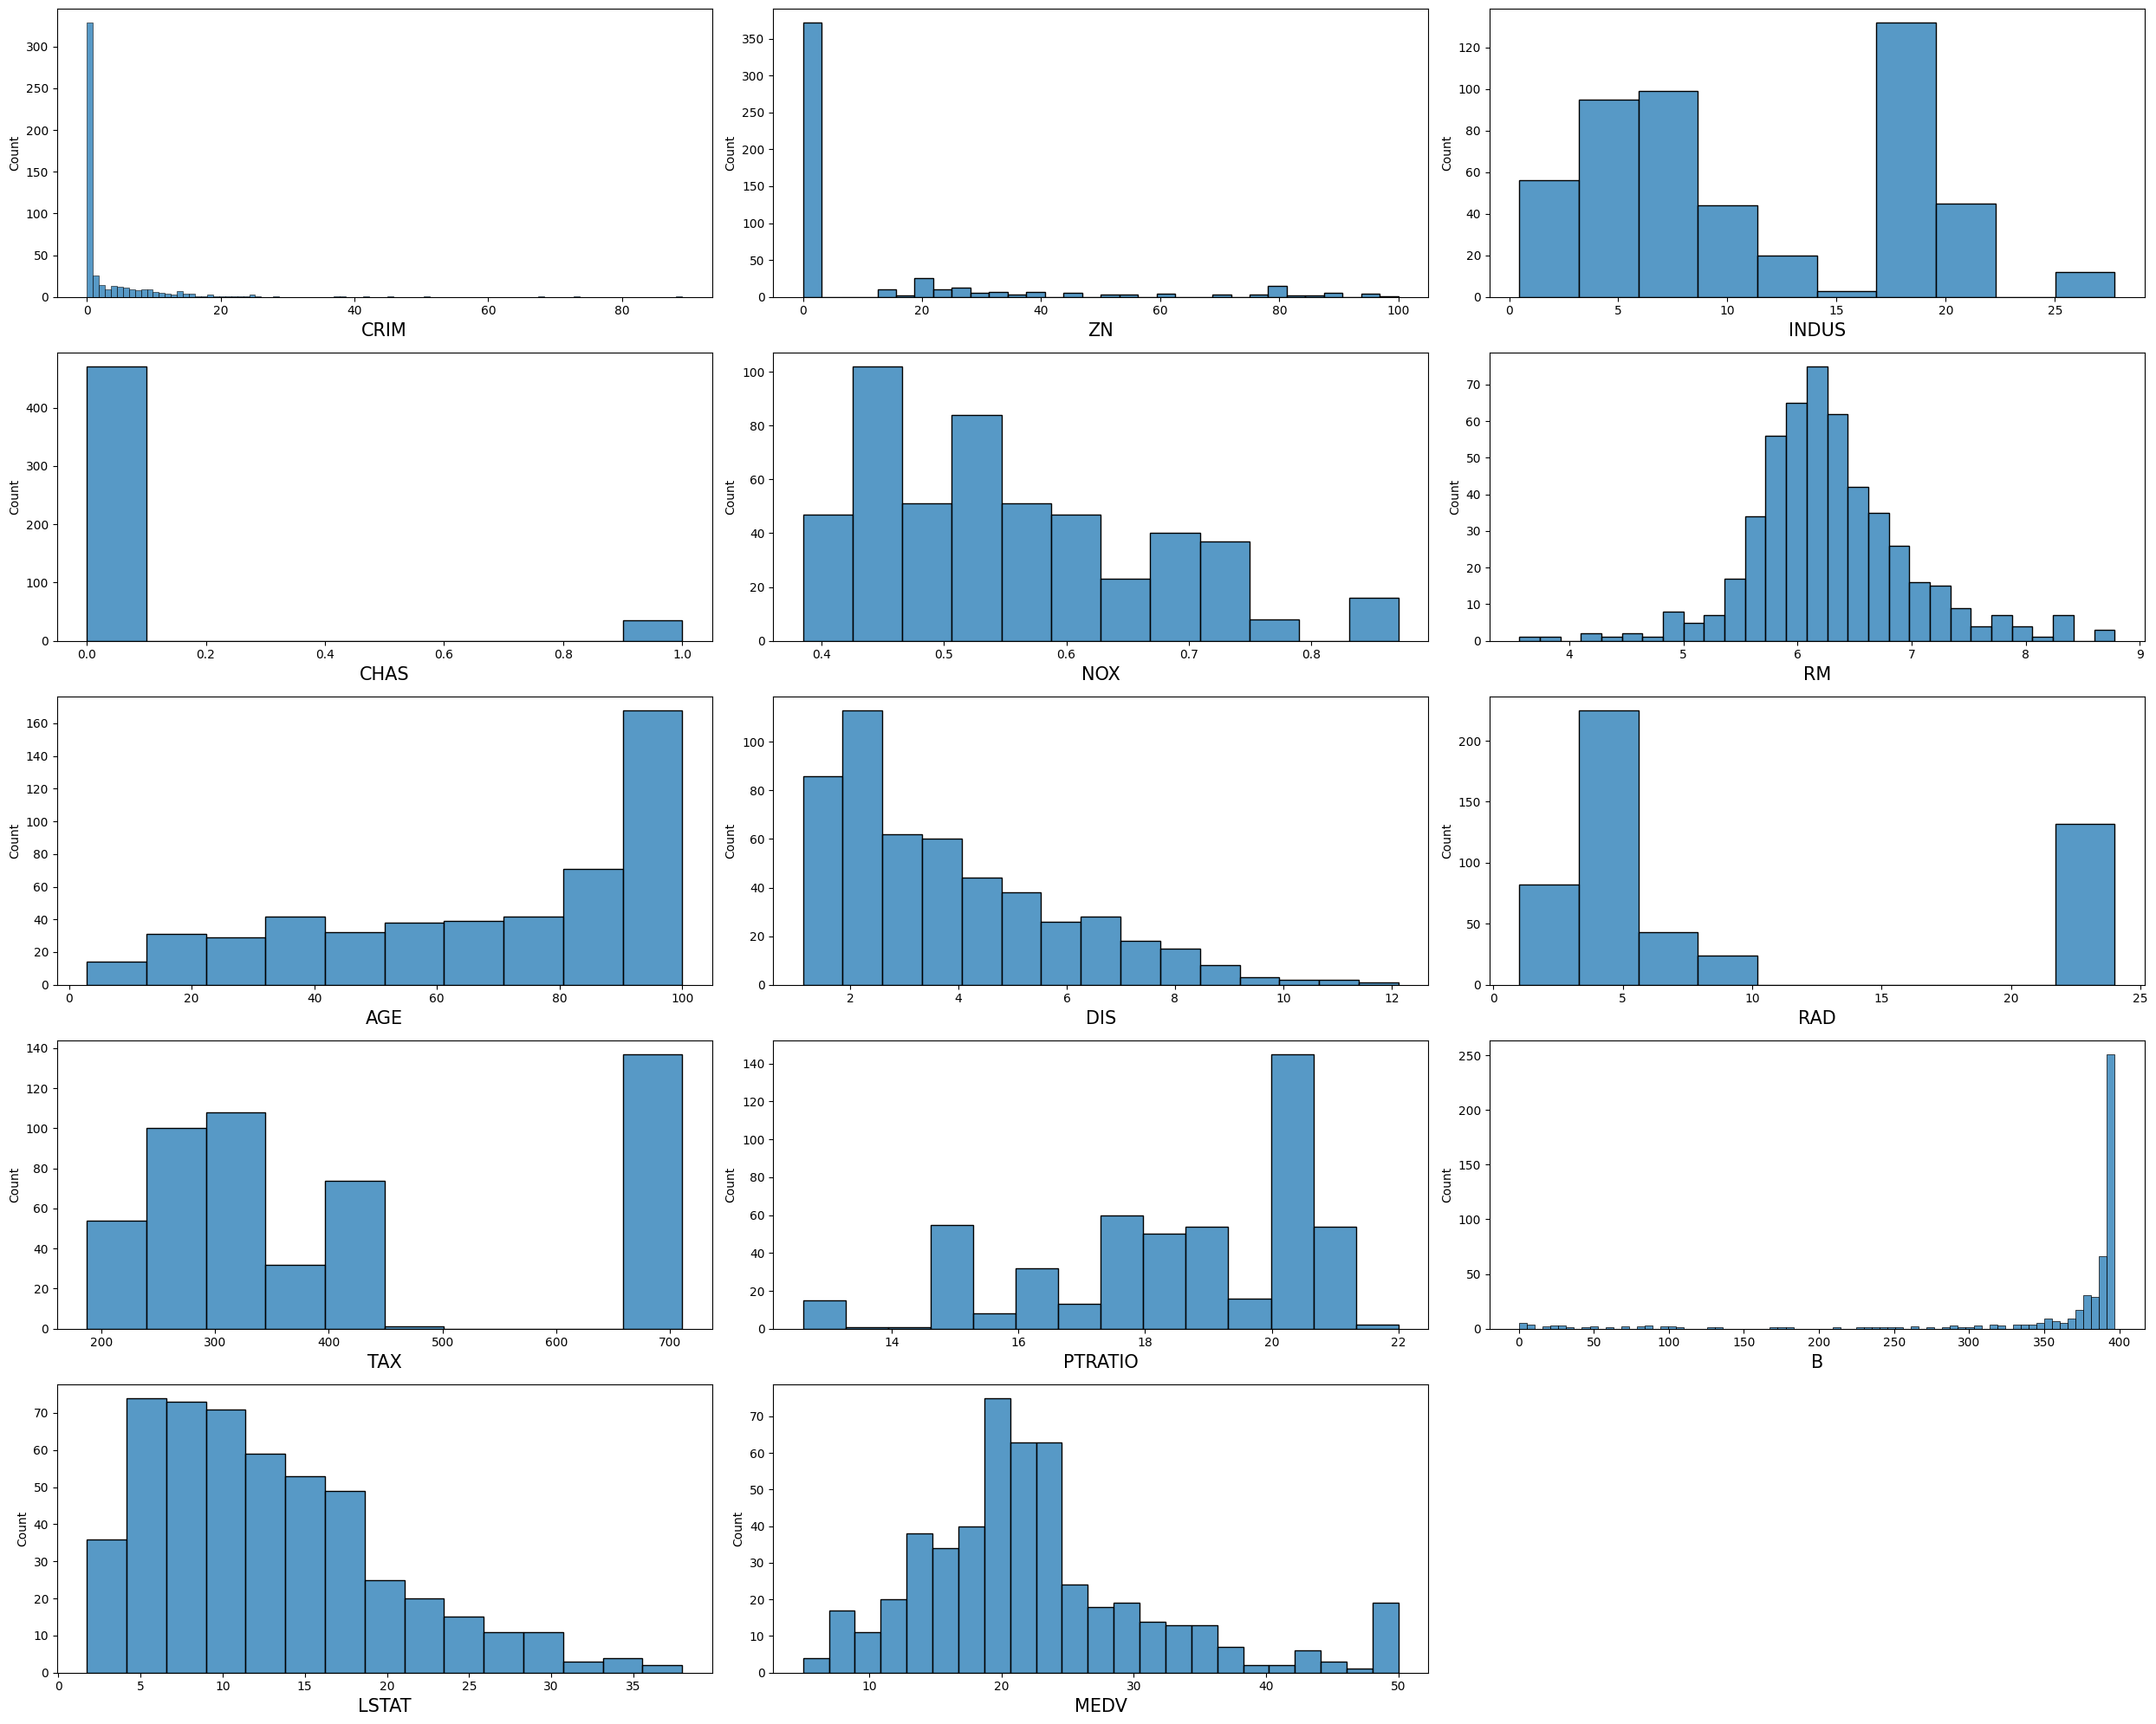

In [20]:
# Histogram
plt.figure(figsize = (25, 20))
i = 1
for col in house:
    if i <= 14:
        ax = plt.subplot(5, 3, i)
        sns.histplot(house[col])
        plt.xlabel(col, fontsize = 15)

    i += 1

plt.tight_layout()
plt.show()

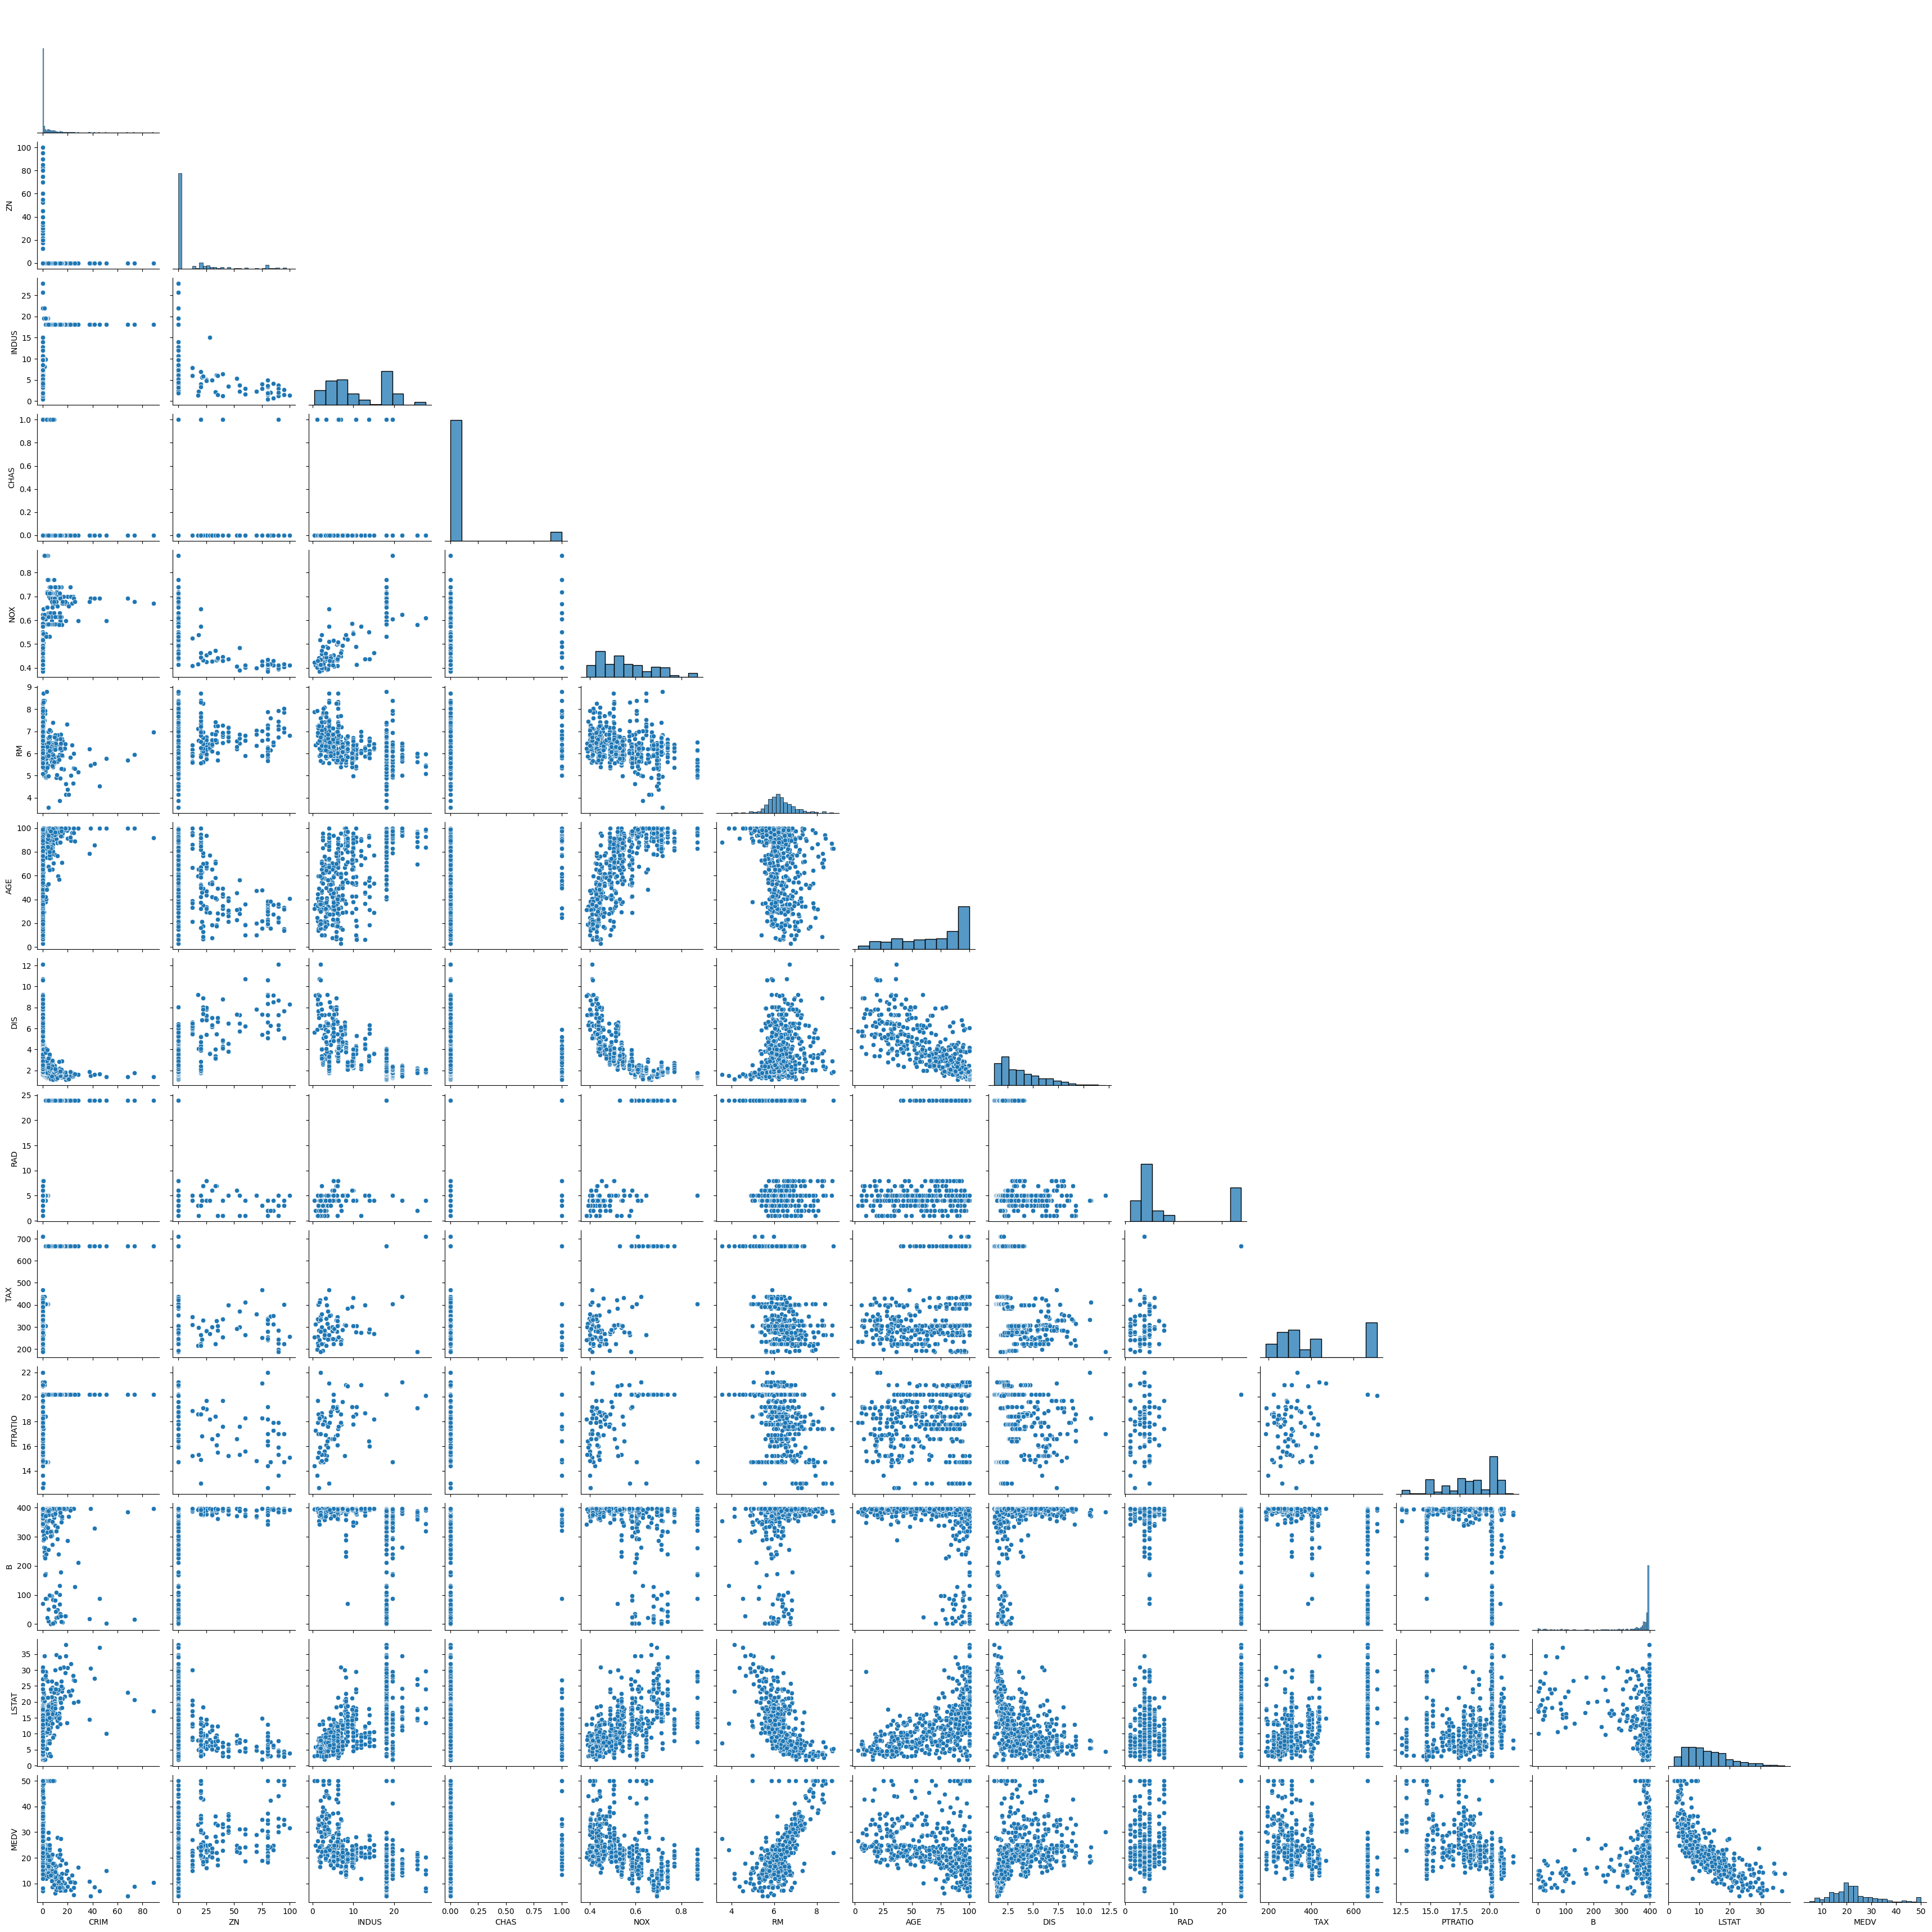

In [30]:
# Scatterplot Matrix
sns.pairplot(house, palette='viridis', corner=True)
plt.show()

## Q3-1. 다중공선성(multicolinearity)을 확인하기 위해 VIF를 추가로 확인해봅시다.

In [6]:
# 그대로 실행하기 !!
from statsmodels.stats.outliers_influence import variance_inflation_factor  # statsmodel 라이브러리의 variance_inflation_factor 함수 불러오기

vif = pd.DataFrame()  # VIF 값을 저장할 데이터프레임 생성
vif['VIF Factor'] = [variance_inflation_factor(house.values, i) for i in range(house.shape[1])]
# house.values:판다스 데이터프레임인 house를 넘파이 배열로 변환
# house.shape[1]: house의 열 개수
# variance_inflation_factor(values, i): values는 독립변수 배열, i는 VIF를 계산할 열 인덱스

vif['features'] = house.columns
vif

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


## Q3-2.
VIF가 높은 변수가 하나씩 줄어들면 다른 변수들의 VIF에도 영향을 미치기 때문에 변수들을 한 번에 다 제거하기보다는 하나씩 제거하면서 확인해 나아가는 것이 바람직합니다! 여러 차례 VIF를 확인해보면서 변수를 제거해보세요!

In [7]:
vif = pd.DataFrame()
x_data = house.drop( 'RM' ,axis=1) # VIF 높은 변수 기입
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif
# VIF가 136.101743으로 가장 높았던 RM 변수 제거

,VIF Factor,features
0,2.110287,CRIM
1,2.889159,ZN
2,14.202832,INDUS
3,1.174535,CHAS
4,62.073615,NOX
5,20.752654,AGE
6,14.258330,DIS
7,15.134503,RAD
8,61.603579,TAX
9,69.068505,PTRATIO


In [8]:
# 여전히 VIF 값들이 크므로, 그 다음으로 VIF가 69.068505로 가장 큰 PTRATIO 변수 제거
vif = pd.DataFrame()
new_data = x_data.drop( 'PTRATIO' ,axis=1)
vif["VIF Factor"] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]
vif["features"] = new_data.columns
vif

,VIF Factor,features
0,2.104099,CRIM
1,2.558330,ZN
2,14.147928,INDUS
3,1.162582,CHAS
4,59.247225,NOX
5,20.427509,AGE
6,9.639018,DIS
7,15.130157,RAD
8,58.759509,TAX
9,19.222365,B


In [9]:
# 여전히 큰 VIF 값들이 확인되므로, 그 다음으로 VIF가 59.247225, 58.759509인 NOX, TAX 변수 제거
vif = pd.DataFrame()
new1_data = new_data.drop( ['NOX', 'TAX'] ,axis=1)
vif["VIF Factor"] = [variance_inflation_factor(new1_data.values, i) for i in range(new1_data.shape[1])]
vif["features"] = new1_data.columns
vif
# 많은 변수들의 VIF 값이 10보다 작고, 다른 변수들의 VIF도 20을 넘지 않으므로 다중 공선성이 어느 정도 제거된 것 같다. (RM, PTRATIO, NOX, TAX 제거)

,VIF Factor,features
0,2.103261,CRIM
1,2.465535,ZN
2,9.024818,INDUS
3,1.142745,CHAS
4,16.449470,AGE
5,8.722321,DIS
6,4.858231,RAD
7,18.131319,B
8,10.934458,LSTAT
9,11.385287,MEDV


**house 데이터셋에 변수 제거를 적용하지 않고 우선 진행하세요! 추후에 MSE 비교를 통해 변수 제거를 확실히 해봅시다.**

# Q4: 데이터를 `X_train`, `X_test`, `y_train`, `y_test` 로 split해 봅시다

split 비율은 자유롭게 정해보시기 바랍니다.

In [40]:
# train_test_split

# (1) 독립변수(x)와 종속변수(y) 설정
X = house.drop("MEDV", axis = 1)
y = house["MEDV"]

# (2) 데이터 split - 80:20으로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# Q5: `StandardScaler`로 표준화를 해봅시다

CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT 변수들만 `StandardScaler`을 해봅시다. (이들 중 다중공선성으로 인해 제거한 변수들이 있다면 제외하고 진행해주세요.)

`X_train`은 `fit_transform`, `X_test`는 `transform`을 이용하는 것에 유의합시다!

In [41]:
# StandardScaler
# 다중공선성이 높았던 RM, PTRATIO, NOX, TAX는 제외하고, CRIM, ZN, INDUS, AGE, DIS, B, LSTAT 변수들에 대해서만 표준화 진행

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'B', 'LSTAT']])
X_test = scaler.transform(X_test[['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'B', 'LSTAT']])

# Q6: 5-fold Cross-Validation으로 `LinearRegression`을 적합해봅시다.

각 fold마다 적합 후 MSE, MAE, RMSE, $R^2$를 구하고, coefficient과 intercept를 `print` 해보세요.

In [45]:
# KFold, cross_val_score, cross_validation 이용
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 1)  # KFold 객체 생성
model = LinearRegression()

fold_idx = 1    # 결과 출력을 위한 fold index 설정
MSE_list = []   # 마지막에 MSE, MAE, RMSE, R^2 값의 평균을 구하기 위한 리스트 생성
MAE_list = []
RMSE_list = []
R2_list = []

for (train_idx, valid_idx) in kf.split(X_train):    # kf.split(X_train)을 통해 X_train을 5개의 폴드로 나누어 학습 데이터와 검증 데이터의 인덱스를 생성함 -> (train_idx, valid_idx)의 인덱스 쌍 생성
  X_train_fold, X_val_fold = X_train[train_idx], X_train[valid_idx]   # train_idx와 valid_idx를 이용한 인덱싱으로 train 데이터셋과 validation 데이터셋 분리
  y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]   # y_train의 타입은 판다스의 시리즈이므로 .iloc[]를 이용해서 인덱싱

  model.fit(X_train_fold, y_train_fold)
  y_pred = model.predict(X_val_fold)

  # 결과 출력
  print(f"[Fold {fold_idx}]")
  print(f"MSE: {round(metrics.mean_squared_error(y_val_fold, y_pred), 4)}")
  print(f"MAE: {round(metrics.mean_absolute_error(y_val_fold, y_pred), 4)}")
  print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y_val_fold, y_pred)), 4)}")
  print(f"R^2: {round(metrics.r2_score(y_val_fold, y_pred), 4)}")
  print(f"Coefficients: {model.coef_}")
  print(f"Intercept: {model.intercept_}")
  print("----------------------------------------------------------------------------------------")

  MSE_list.append(metrics.mean_squared_error(y_val_fold, y_pred))     # 마지막에 MSE, MAE, RMSE, R^2 값의 평균을 구하기 위해 리스트에 값 추가
  MAE_list.append(metrics.mean_absolute_error(y_val_fold, y_pred))
  RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_val_fold, y_pred)))
  R2_list.append(metrics.r2_score(y_val_fold, y_pred))
  fold_idx += 1

print(f"Average MSE = {np.mean(MSE_list)}")
print(f"Average MAE = {np.mean(MAE_list)}")
print(f"Average RMSE = {np.mean(RMSE_list)}")
print(f"Average R^2 = {np.mean(R2_list)}")

[Fold 1]
MSE: 30.8064
MAE: 4.1139
RMSE: 5.5504
R^2: 0.6072
Coefficients: [-0.97124465  2.44185897 -1.40010656  0.24195797 -3.55878884  0.47267898
 -6.1421052 ]
Intercept: 22.642467835036136
----------------------------------------------------------------------------------------
[Fold 2]
MSE: 21.8604
MAE: 3.8854
RMSE: 4.6755
R^2: 0.5483
Coefficients: [-0.8660102   2.64459828 -1.56127637  0.40796203 -3.82115368  0.55233152
 -6.38983899]
Intercept: 22.781827123606707
----------------------------------------------------------------------------------------
[Fold 3]
MSE: 21.2679
MAE: 3.4918
RMSE: 4.6117
R^2: 0.7133
Coefficients: [-0.82956921  2.19488281 -1.78427133  0.41898832 -3.72662784  0.59975501
 -6.25553302]
Intercept: 22.55880286798527
----------------------------------------------------------------------------------------
[Fold 4]
MSE: 45.8279
MAE: 4.5483
RMSE: 6.7696
R^2: 0.547
Coefficients: [-0.99153974  2.74051077 -1.77315128  0.26277094 -3.83642926  0.31902032
 -5.86280294]
Inter

### Q6-1: 다중공선성이 높았던 변수를 제거한 후 다시 train_test_split, scaler, 5-fold CV 과정으로 `LinearRegression`을 적합한 후 Q6에서 구한 평균 MSE(or MAE, RMSE, $R^2$)와 비교해보세요.

In [43]:
# 다중공선성을 불러일으키는 변수 제거
house_new = house.drop(['RM', 'PTRATIO', 'NOX', 'TAX'], axis=1) # VIF 높은 변수들 기입

In [46]:
# train_test_split
# (1) 독립변수(x)와 종속변수(y) 설정
X_new = house_new.drop("MEDV", axis = 1)
y_new = house_new["MEDV"]

# (2) 데이터 split - 80:20으로 분할
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.20, random_state = 1)

# StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

# KFold, cross_val_score, cross_validation 이용
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
model = LinearRegression()

fold_idx = 1
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

for (train_idx, valid_idx) in kf.split(X_train_new):
  X_train_fold, X_val_fold = X_train_new[train_idx], X_train_new[valid_idx]
  y_train_fold, y_val_fold = y_train_new.iloc[train_idx], y_train_new.iloc[valid_idx]

  model.fit(X_train_fold, y_train_fold)
  y_pred = model.predict(X_val_fold)

  print(f"[Fold {fold_idx}]")
  print(f"MSE: {round(metrics.mean_squared_error(y_val_fold, y_pred), 4)}")
  print(f"MAE: {round(metrics.mean_absolute_error(y_val_fold, y_pred), 4)}")
  print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y_val_fold, y_pred)), 4)}")
  print(f"R^2: {round(metrics.r2_score(y_val_fold, y_pred), 4)}")
  print(f"Coefficients: {model.coef_}")
  print(f"Intercept: {model.intercept_}")
  print("----------------------------------------------------------------------------------------")

  MSE_list.append(metrics.mean_squared_error(y_val_fold, y_pred))
  MAE_list.append(metrics.mean_absolute_error(y_val_fold, y_pred))
  RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_val_fold, y_pred)))
  R2_list.append(metrics.r2_score(y_val_fold, y_pred))
  fold_idx += 1

print(f"Average MSE = {np.mean(MSE_list)}")
print(f"Average MAE = {np.mean(MAE_list)}")
print(f"Average RMSE = {np.mean(RMSE_list)}")
print(f"Average R^2 = {np.mean(R2_list)}")

# 평균 MSE가 31.330230099699197에서 30.733975403901894로 감소했다.
# 평균 MAE가 4.000729952091293에서 3.954330504839207로 감소했다.
# 평균 RMSE가 5.536160366909209에서 5.491899915892468로 감소했다.
# 평균 R^가 0.6071762302865815에서 0.6129917347564554로 증가했다.
# 네 가지 성능지표를 보았을 때, 모델의 성능이 향상되었음을 알 수 있다.

[Fold 1]
MSE: 30.2161
MAE: 3.933
RMSE: 5.4969
R^2: 0.6147
Coefficients: [-0.9925185   2.36017821 -1.55234515  0.87987138  0.10561241 -3.41826816
  0.2429557   0.4855955  -5.96152711]
Intercept: 22.635062784622892
----------------------------------------------------------------------------------------
[Fold 2]
MSE: 21.8544
MAE: 3.7949
RMSE: 4.6749
R^2: 0.5484
Coefficients: [-0.91375015  2.60242182 -1.68062619  0.92947747  0.29449973 -3.67782967
  0.30523407  0.56526011 -6.26244958]
Intercept: 22.779066063802933
----------------------------------------------------------------------------------------
[Fold 3]
MSE: 22.0764
MAE: 3.6086
RMSE: 4.6985
R^2: 0.7024
Coefficients: [-0.86358643  2.09315087 -1.93551078  1.00581927  0.3091201  -3.55827892
  0.29690011  0.63422816 -6.10783852]
Intercept: 22.550240924069012
----------------------------------------------------------------------------------------
[Fold 4]
MSE: 44.4676
MAE: 4.4741
RMSE: 6.6684
R^2: 0.5604
Coefficients: [-0.88499848  2.653

# Q7: `GridSearchCV`를 이용하여 `Lasso`를 적합해봅시다.

찾아야 하는 최적 파라미터는

- `alpha`: 0.01, 0.1, 1, 10 중에서 찾기
- `fit_intercept`: `True`, `False`에서 찾기

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

위 링크를 참조하여 `GridSearCV`의 `scoring`을 3가지 이상 사용해보세요

In [66]:
# scoring은 모델의 성능 지표를 결정하는 파라미터
# neg_mean_squared_error, neg_root_mean_squared_error, neg_mean_absolute_error, r2 이용

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Lasso 회귀는 각 변수의 scale에 큰 영향을 받고, 변수 선택 기능을 하여 자동으로 다중공선성을 줄여주기 때문에 변수 선택은 생략하고 표준화만 진행
# (1) 독립변수와 종속 변수 설정, 데이터 분할 및 표준화
X = house.drop("MEDV", axis = 1)
y = house["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# (2) 하이퍼파라미터 그리드 설정
lasso = Lasso()
param_grid = {
    'alpha' : [0.01, 0.1, 1, 10],
    'fit_intercept' : [True, False]
}

# (3) scoring 방식에 따른 결과 출력(반복문 이용)
for scoring in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
  print(f"[Scoring 방식: {scoring}]")

  # (a) scoring 방식 지정 후 최적의 하이퍼파라미터 결정
  lasso_cv_model = GridSearchCV(lasso, param_grid, scoring = scoring, cv = 5)
  lasso_cv_model.fit(X_train, y_train)

  best_score = lasso_cv_model.best_score_ if scoring == 'r2' else abs(lasso_cv_model.best_score_)   # neg MSE, neg RMSE, neg MAE는 계산하면 음수로 나오므로 절댓값을 취함

  print(f"Best Hyperparametes: {lasso_cv_model.best_params_}")
  print(f"Best Score: {best_score}")

  # (b) 최적의 하이퍼파라미터로 Lasso 모델 적합 후 예측값 생성
  lasso_model = Lasso(alpha = lasso_cv_model.best_params_['alpha'],
                      fit_intercept = lasso_cv_model.best_params_['fit_intercept'])
  lasso_model.fit(X_train, y_train)

  y_pred = lasso_model.predict(X_test)

  # (c) 평가 지표 계산
  print(f"Model Performance:")
  print(f"  MSE: {mean_squared_error(y_test, y_pred)}")
  print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
  print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
  print(f"  R2 Score: {r2_score(y_test, y_pred)}")

  # (d) 모델의 계수 및 절편 출력
  print("Best Model Coefficients & Intercept:")
  print(f"  Coefficients: {lasso_model.coef_}")
  print(f"  Intercept: {lasso_model.intercept_}")

  print('______________________________________________________')

# Q6에서 일반 회귀를 적합했을 때의 평균 MSE, MAE, RMSE와 비교했을 때 모두 더 낮은 값으로 계산되었고, R^2은 더 큰 값으로 계산되었다.
# 따라서 Lasso 회귀를 적합했을 때의 모델 성능이 더 뛰어남을 알 수 있다.

[Scoring 방식: neg_mean_squared_error]
Best Hyperparametes: {'alpha': 0.01, 'fit_intercept': True}
Best Score: 23.8706486784423
Model Performance:
  MSE: 23.41032871021621
  MAE: 3.748759529141606
  RMSE: 4.838422130221402
  R2 Score: 0.7631190215910009
Best Model Coefficients & Intercept:
  Coefficients: [-0.9983405   1.29179138  0.0293823   0.57751155 -2.20111044  2.14912818
  0.08147219 -3.13152924  2.44533716 -1.6798403  -2.12152258  0.65886303
 -3.90139041]
  Intercept: 22.522277227722775
______________________________________________________
[Scoring 방식: neg_root_mean_squared_error]
Best Hyperparametes: {'alpha': 0.01, 'fit_intercept': True}
Best Score: 4.8528445774194795
Model Performance:
  MSE: 23.41032871021621
  MAE: 3.748759529141606
  RMSE: 4.838422130221402
  R2 Score: 0.7631190215910009
Best Model Coefficients & Intercept:
  Coefficients: [-0.9983405   1.29179138  0.0293823   0.57751155 -2.20111044  2.14912818
  0.08147219 -3.13152924  2.44533716 -1.6798403  -2.12152258  0

# Q8(Optional): BONUS! `RandomizedSearchCV`를 이용하여 `Ridge`를 적합해 봅시다.

CV를 이용한 hyperparameter tuning의 또다른 방법은 `RandomizedSearchCV`입니다.
Tuning해야 하는 모수가 많을 경우 이 방법이 빠르다는 장점이 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#

위 링크를 참조하거나 구글링을 하여 `Ridge`를 적합해보세요.

`n_iter`와, 파라미터 공간을 자유롭게 조정해보세요.

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge()
param_grid = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept' : [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']   # solver: 최적화 알고리즘을 지정
}

# (3) scoring 방식에 따른 결과 출력(반복문 이용)
for scoring in ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
  print(f"[Scoring 방식: {scoring}]")

  # (a) scoring 방식 지정 후 최적의 하이퍼파라미터 결정
  ridge_cv_model = RandomizedSearchCV(ridge, param_grid, n_iter = 100, scoring = scoring, cv = 5)
  ridge_cv_model.fit(X_train, y_train)

  best_score = ridge_cv_model.best_score_ if scoring == 'r2' else abs(ridge_cv_model.best_score_)   # neg MSE, neg RMSE, neg MAE는 계산하면 음수로 나오므로 절댓값을 취함

  print(f"Best Hyperparametes: {ridge_cv_model.best_params_}")
  print(f"Best Score: {best_score}")

  # (b) 최적의 하이퍼파라미터로 Lasso 모델 적합 후 예측값 생성
  ridge_model = Ridge(alpha = ridge_cv_model.best_params_['alpha'],
                      fit_intercept = ridge_cv_model.best_params_['fit_intercept'],
                      solver = ridge_cv_model.best_params_['solver'])
  ridge_model.fit(X_train, y_train)

  y_pred = ridge_model.predict(X_test)

  # (c) 평가 지표 계산
  print(f"Model Performance:")
  print(f"  MSE: {mean_squared_error(y_test, y_pred)}")
  print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
  print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
  print(f"  R2 Score: {r2_score(y_test, y_pred)}")

  # (d) 모델의 계수 및 절편 출력
  print("Best Model Coefficients & Intercept:")
  print(f"  Coefficients: {ridge_model.coef_}")
  print(f"  Intercept: {ridge_model.intercept_}")

  print('______________________________________________________')

[Scoring 방식: neg_mean_squared_error]
Best Hyperparametes: {'solver': 'auto', 'fit_intercept': True, 'alpha': 1}
Best Score: 23.886714810462173
Model Performance:
  MSE: 23.382184229960103
  MAE: 3.749581433601237
  RMSE: 4.8355128197493285
  R2 Score: 0.763403805803235
Best Model Coefficients & Intercept:
  Coefficients: [-1.0156343   1.32421365  0.0956198   0.57927351 -2.24806166  2.14519127
  0.11639109 -3.13829452  2.55136587 -1.78858584 -2.13326888  0.66917685
 -3.90516498]
  Intercept: 22.522277227722775
______________________________________________________
[Scoring 방식: neg_root_mean_squared_error]
Best Hyperparametes: {'solver': 'svd', 'fit_intercept': True, 'alpha': 1}
Best Score: 4.8544749288284414
Model Performance:
  MSE: 23.382184229960117
  MAE: 3.7495814336012385
  RMSE: 4.83551281974933
  R2 Score: 0.7634038058032349
Best Model Coefficients & Intercept:
  Coefficients: [-1.0156343   1.32421365  0.0956198   0.57927351 -2.24806166  2.14519127
  0.11639109 -3.13829452  2.55